<h3> Imports </h3>

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as matplot

<h3> Load dataset </h3>

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 8s 2us/step


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


<h3> EDA: Exploratory Data Analysis </h3>

In [13]:
print('Training Images: {} --> {}'.format(train_images.shape, '(number of images, width, height)')) # (number of images, width, height)
print('Training Labels: {} --> {}'.format(train_labels.shape, 'label of each image')) # label of each image
print('Testing Images: {} --> {}'.format(test_images.shape,  '(number of images, width, height)')) # (number of images, width, height)
print('Testing Labels: {} --> {}'.format(test_labels.shape, 'label of each image')) # label of each image

Training Images: (60000, 28, 28) --> (number of images, width, height)
Training Labels: (60000,) --> label of each image
Testing Images: (10000, 28, 28) --> (number of images, width, height)
Testing Labels: (10000,) --> label of each image


In [17]:
train_labels # array of labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

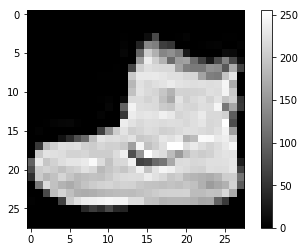

In [20]:
matplot.figure()
matplot.imshow(X = train_images[0])
matplot.colorbar()
matplot.grid(False)
matplot.gray()

<b> Pixel values are in the range (0 - 255) <br> </b>
<i> Preprocess all of the images. Scale image so pixel value will be in the range of <b>(0 - 1)    

In [21]:
train_images = train_images / 255.0
test_images = test_images / 255.0

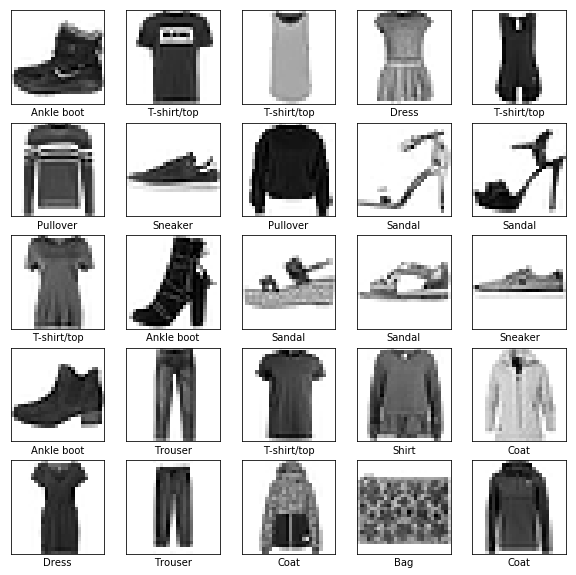

In [27]:
matplot.figure(figsize = (10, 10))

# creating 25 subplots arranged in the grid of 5, 5
for i in range(0, 25, 1):
    matplot.subplot(5, 5, i + 1)
    matplot.grid(False)
    matplot.xticks(ticks = [])
    matplot.yticks(ticks = [])
    matplot.imshow(X = train_images[i], cmap = matplot.cm.binary)
    matplot.xlabel(class_names[train_labels[i]])

<h3> Build Model </h3>

In [51]:
nn_model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), # Converting 28 x 28 to 784 x 1
    keras.layers.Dense(units = 5, activation = tf.nn.relu),
    keras.layers.Dense(units = 10, activation = tf.nn.softmax)
])

<h3> Compile Model

In [52]:
nn_model.compile(optimizer = tf.train.AdamOptimizer(),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

<h3> Train Model

In [53]:
nn_model.fit(x = train_images, y = train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.7945 - acc: 0.7281
Epoch 2/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.5732 - acc: 0.8050
Epoch 3/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.5401 - acc: 0.8138
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.5222 - acc: 0.8200
Epoch 5/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.5091 - acc: 0.8249


<h3>Evaluate Model

In [54]:
test_loss, test_acc = nn_model.evaluate(x = test_images, y = test_labels)
print('Test Accuracy: ' + str(test_acc))
print('Test Loss: ' + str(test_loss))

10000/10000 [==============================] - 0s 49us/step
Test Accuracy: 0.8163
Test Loss: 0.5376499201774597


<h3> Make predictions

In [55]:
predictions = nn_model.predict(x = test_images)

In [56]:
predictions[0] # confidence for each label

array([3.3950366e-06, 5.3546808e-07, 2.1422952e-06, 2.2133271e-04,
       3.5619622e-04, 1.3578239e-01, 5.7510074e-06, 2.4061877e-01,
       4.1856696e-03, 6.1882377e-01], dtype=float32)

In [63]:
print('Maximum confidence {conf} that this image is {l}. '.format(conf = np.max(predictions[0]), l = class_names[np.argmax(predictions[0])]))

Maximum confidence 0.618823766708374 that this image is Ankle boot. 


<h4> Visualize predictions

In [64]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  matplot.grid(False)
  matplot.xticks([])
  matplot.yticks([])
  
  matplot.imshow(img, cmap=matplot.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  matplot.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  matplot.grid(False)
  matplot.xticks([])
  matplot.yticks([])
  thisplot = matplot.bar(range(10), predictions_array, color="#777777")
  matplot.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

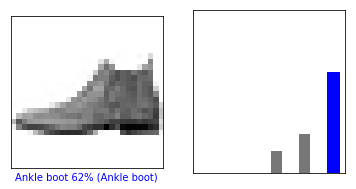

In [65]:
i = 0
matplot.figure(figsize=(6,3))
matplot.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
matplot.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

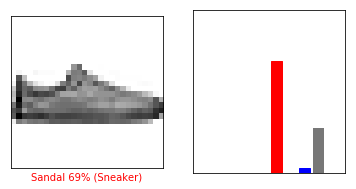

In [67]:
i = 12
matplot.figure(figsize=(6,3))
matplot.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
matplot.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

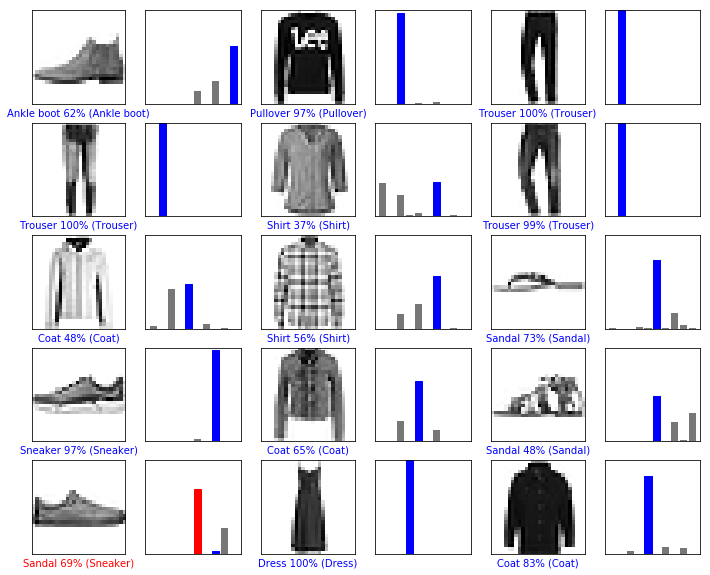

In [69]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
matplot.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  matplot.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  matplot.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

<h4> Batchwise predictions

In [71]:
#Batch of one image
img = test_images[0]
img = (np.expand_dims(img,0))

In [73]:
predictions_single = nn_model.predict(img)

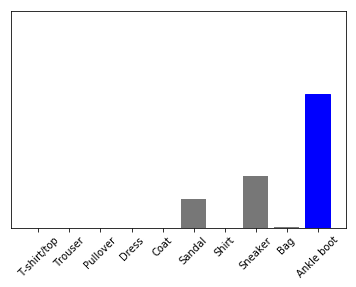

In [75]:
plot_value_array(0, predictions_single, test_labels)
_ = matplot.xticks(range(10), class_names, rotation=45)

In [85]:
#Batch of one image
imgs = test_images[0: 10]

In [86]:
imgs.shape

(10, 28, 28)

In [87]:
predictions_batch = nn_model.predict(imgs)

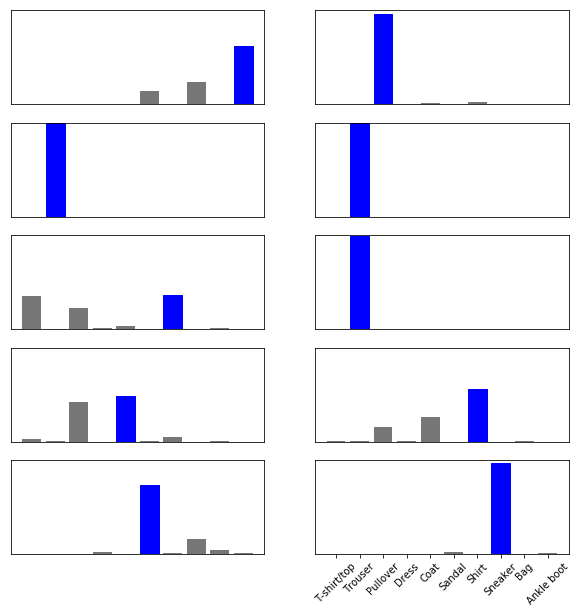

In [98]:
matplot.figure(figsize = (10, 10))
for i in range(0, 10, 1):
    matplot.subplot(5, 2, i + 1)
    plot_value_array(i, predictions_batch, test_labels)
_ = matplot.xticks(range(10), class_names, rotation=45)